# Employee Clustering
* The objective of this task is to cluster the employees of a company into groups in order to understand employees better so that HR can better satisfy and retain employees

Questions to be answered:
* How to achieve employee segmentation using unsupervised machine learning algorithm in Python?
* Describe the characteristics of each employee cluster. 
* Which group of employee is the most vulnerable that the management should do something to retain them.

## Student Details
* Name: Lim Jun Jie
* Class: DAAA/2A/FT/02
* Admin Number: 2100788

## Dataset Features
| Column Name | DataType | Definition |
| :-: | :-: | :-: |
| Age | Discrete | Age of Employee |
| Gender | Nominal | Gender of Employee |
| BusinessTravel | Ordinal | How often does the employee travel |
| Job Function | Nominal | Employee's Job Scope |
| Distance | Continuous | Distance between company and home (KM) |
| Education | Ordinal | Employee's Education Level (1=lowest, 5=highest) |
| Job Satisfaction | Ordinal | Employee's satisfaction with the job (1=lowest, 4=highest) |
| Marital Status | Nominal | Employee's Marital Status |
| Salary | Continuous | Employee's Monthly Income ($) |
| Performance Rating | Ordinal | Employee's performance on the job (1=lowest, 4=highest) |
| Work Life Balance | Ordinal | Employee's rating on their work life balance (1=lowest, 4=highest) |
| Length of Service | Discrete | Number of years at the company |
| Resign Status | Nominal | Employee's resignation status (Yes/No) |

## Library Imports

In [85]:
#pip install yellowbrick

In [86]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score, silhouette_samples, calinski_harabasz_score

from yellowbrick.cluster import KElbowVisualizer, silhouette_visualizer

## Initial Observations
* There are 1470 rows and 3 features in this dataset with 0 missing values
* There is an abundance of categorical variables
* The column names need to be changed for ease of use

In [87]:
plt.style.use('seaborn-talk')

In [88]:
employees = pd.read_csv('unsupervised_data/Company_Employee.csv')
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Age                                             1470 non-null   int64 
 1   Gender                                          1470 non-null   object
 2   BusinessTravel                                  1470 non-null   object
 3   Job Function                                    1470 non-null   object
 4   Distance Between Company and Home (KM)          1470 non-null   int64 
 5   Education (1 is lowest, 5 is highest)           1470 non-null   int64 
 6   Job Satisfaction (1 is lowest, 4 is highest)    1470 non-null   int64 
 7   MaritalStatus                                   1470 non-null   object
 8   Salary ($)                                      1470 non-null   int64 
 9   Performance Rating (1 is lowest, 4 is highest)  1470

In [89]:
display(employees)

,Age,Gender,BusinessTravel,Job Function,Distance Between Company and Home (KM),"Education (1 is lowest, 5 is highest)","Job Satisfaction (1 is lowest, 4 is highest)",MaritalStatus,Salary ($),"Performance Rating (1 is lowest, 4 is highest)","Work Life Balance (1 is worst, 4 is best)",Length of Service (Years),Resign Status
0,41,Female,Travel_Rarely,Sales,1,2,4,Single,5993,3,1,6,Yes
1,49,Male,Travel_Frequently,Research & Development,8,1,2,Married,5130,4,3,10,No
2,37,Male,Travel_Rarely,Research & Development,2,2,3,Single,2090,3,3,0,Yes
3,33,Female,Travel_Frequently,Research & Development,3,4,3,Married,2909,3,3,8,No
4,27,Male,Travel_Rarely,Research & Development,2,1,2,Married,3468,3,3,2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Male,Travel_Frequently,Research & Development,23,2,4,Married,2571,3,3,5,No
1466,39,Male,Travel_Rarely,Research & Development,6,1,1,Married,9991,3,3,7,No
1467,27,Male,Travel_Rarely,Research & Development,4,3,2,Married,6142,4,3,6,No
1468,49,Male,Travel_Frequently,Sales,2,3,2,Married,5390,3,2,9,No


## Changing Feature Names
As some feature names are very long, I am going to shorten the feature names so they are more usable

In [90]:
new_feature_names = { # set new feature names
    'Job Function': 'job_function',
    'Distance Between Company and Home (KM)': 'home_distance',
    'Education (1 is lowest, 5 is highest)': 'education',
    'Job Satisfaction (1 is lowest, 4 is highest)': 'job_satisfaction',
    'Salary ($)': 'salary',
    'Performance Rating (1 is lowest, 4 is highest)': 'performance',
    'Work Life Balance (1 is worst, 4 is best)': 'work_life_balance',
    'Length of Service (Years)': 'years_of_service',
    'Resign Status': 'resign_status',
    'MaritalStatus': 'marital_status'
}

employees.rename(columns=new_feature_names, inplace=True)
employees.columns = employees.columns.str.lower() # make all columns lowercase

In [91]:
display(employees)

,age,gender,businesstravel,job_function,home_distance,education,job_satisfaction,marital_status,salary,performance,work_life_balance,years_of_service,resign_status
0,41,Female,Travel_Rarely,Sales,1,2,4,Single,5993,3,1,6,Yes
1,49,Male,Travel_Frequently,Research & Development,8,1,2,Married,5130,4,3,10,No
2,37,Male,Travel_Rarely,Research & Development,2,2,3,Single,2090,3,3,0,Yes
3,33,Female,Travel_Frequently,Research & Development,3,4,3,Married,2909,3,3,8,No
4,27,Male,Travel_Rarely,Research & Development,2,1,2,Married,3468,3,3,2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Male,Travel_Frequently,Research & Development,23,2,4,Married,2571,3,3,5,No
1466,39,Male,Travel_Rarely,Research & Development,6,1,1,Married,9991,3,3,7,No
1467,27,Male,Travel_Rarely,Research & Development,4,3,2,Married,6142,4,3,6,No
1468,49,Male,Travel_Frequently,Sales,2,3,2,Married,5390,3,2,9,No


# Exploratory Data Analysis
EDA should be an essential step in every Machine Learning task in order to have a better understanding of the dataset

Questions to Answer:
* How many variables are there in each feature for categorical features
* Distribution of continuous features
* Are there any correlation between features
* Is there a observable trend in the data when seperated by resignation status? (Since one of the objective is to retain employees)

In [92]:
employees_eda = employees.copy() # preserve the original dataset

In [93]:
# create list for categorical features
categorical_list = ['gender', 'businesstravel', 'job_function', 'education', 'job_satisfaction', 'marital_status', 'performance', 'work_life_balance', 'resign_status']

# create list for numerical features
numerical_list = list(employees_eda.drop(categorical_list, axis=1).columns)

## Categorical Features Count
From the below countplots, there are some interesting observations that can be seen:
* Most employees are working in Research and Development department. This suggests that the company sells products that need intensive research and development, like computer software.
* Most employees are fairly satisfied with their work-life balance, with majority voting 3.
* The company has no low performers either, there is no employee that has a 1 or 2 performance rating.
* Splitting by resignation status, there is no interesting/abnormal observations to be spotted.

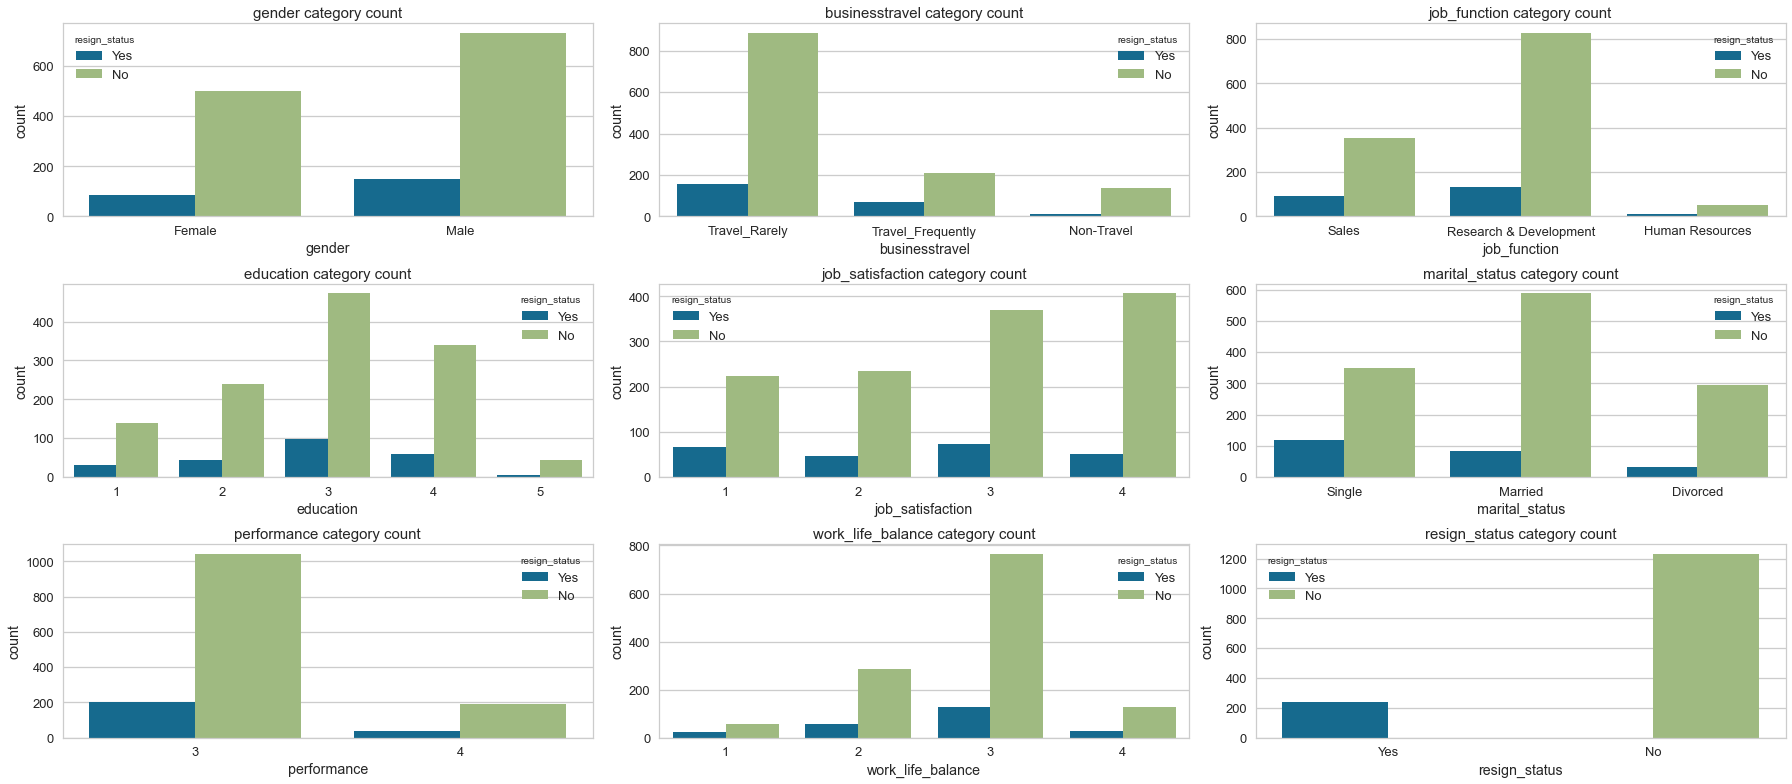

In [94]:
# plot bar graph for each categorical variable

fig = plt.figure(tight_layout=True, figsize=(25, 11))
for i, feature in enumerate(categorical_list):
    ax = fig.add_subplot(3, 3, i+1)
    ax = sns.countplot(x=feature, data=employees_eda, hue='resign_status')
    ax.set_title(f'{feature} category count', fontsize=15)

plt.show()

## Data Distribution (Histogram)
Histograms are plotted for the numerical features:
* All 4 numerical features are positively skewed, this suggests that there are particularly high values in each of the 4 features. Boxplots should be plotted to check for outliers.
* When split by resignation status, the distributions look similar, and there is no abnormal trends that can be spotted

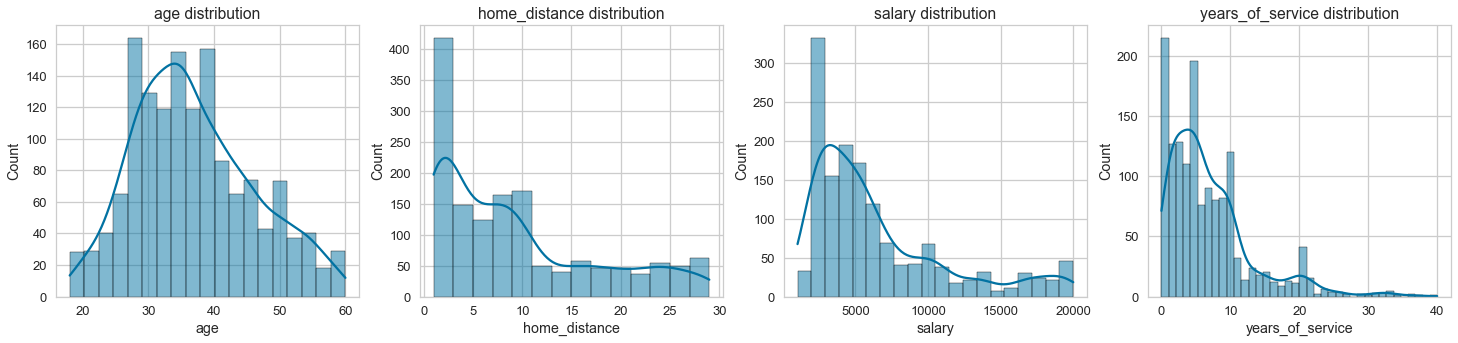

In [95]:
# distribution of numerical variables
fig = plt.figure(figsize=(25, 5))
for i, feature in enumerate(numerical_list):
    ax = fig.add_subplot(1, 4, i+1)
    ax = sns.histplot(x=feature, kde=True, data=employees_eda)
    ax.set_title(f'{feature} distribution')

## Data Distribution (Boxplot)
* The boxplots show that there are no outliers for `age` and `home_distance`. However, there are outliers for `salary` and `years_of_service`.
* The outliers in `salary` can be explained as there will be employees who hold high ranking/important positions in the company and therefore get paid a lot higher than the mean pay.
* The outliers in `years_of_service` seems to show that the mean years of service for an average employee is only 5 years, however there are a few employees who stayed with the company for almost their whole career, with the highest `years_of_service` being 40 years, causing the distribution to be positively skewed.

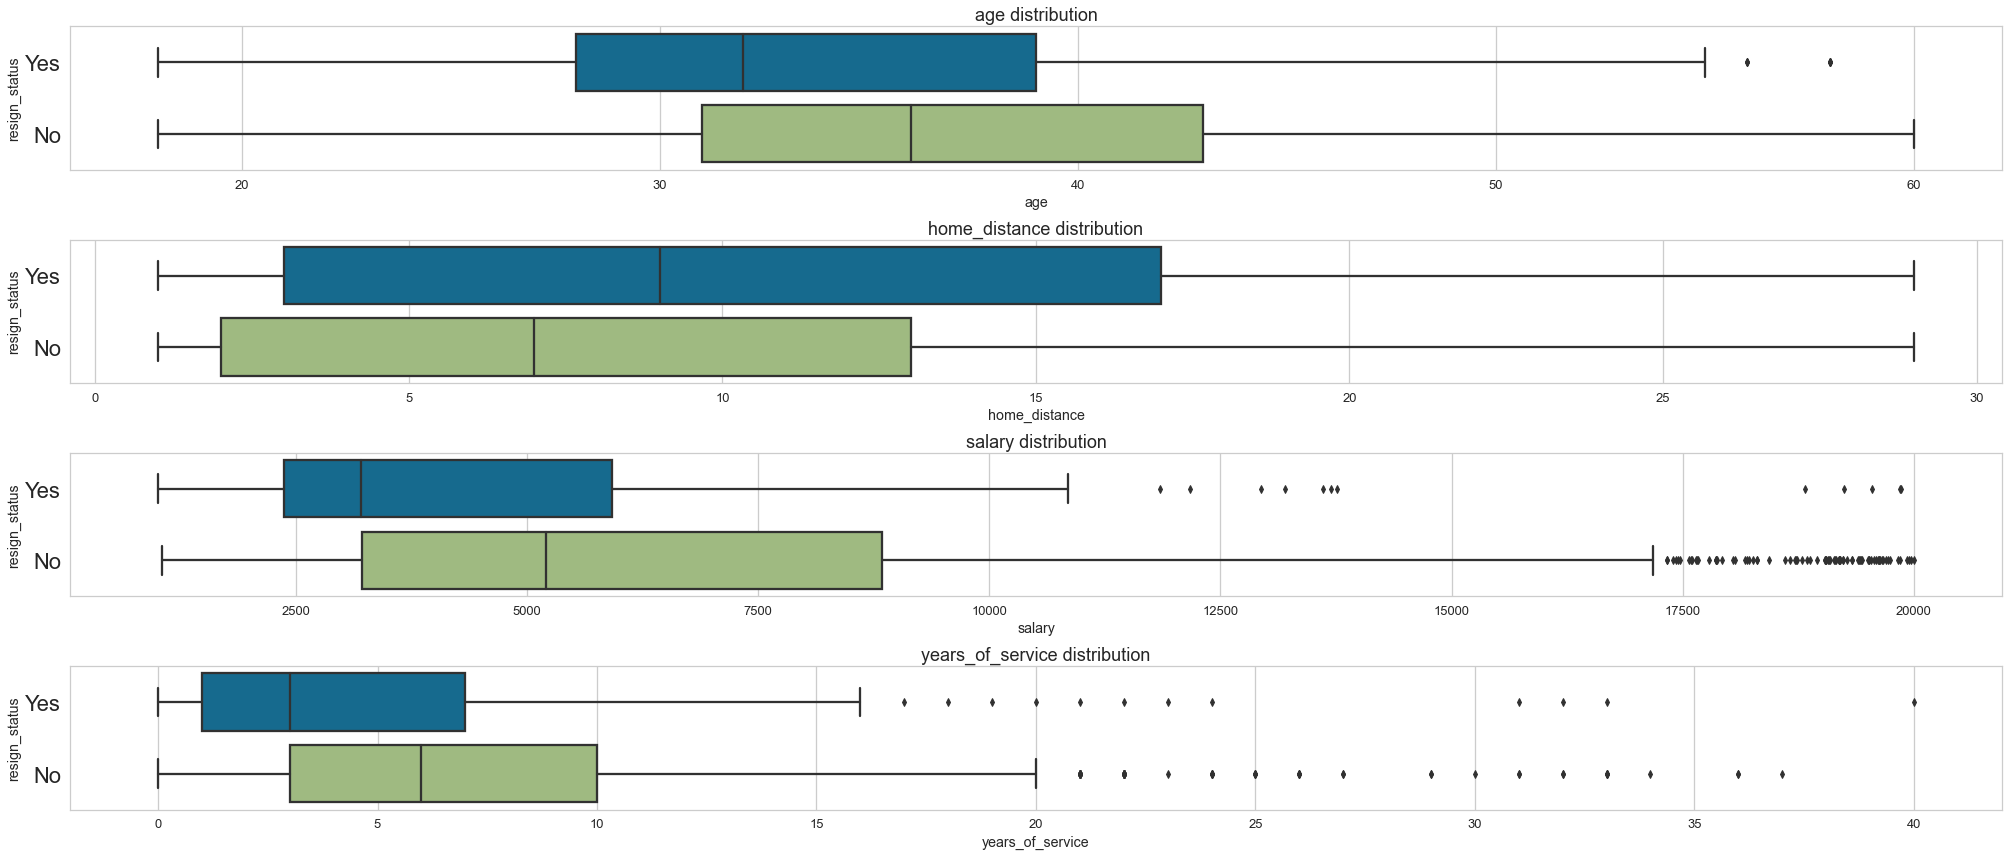

In [96]:
# dsitribution of numerical variables
fig = plt.figure(tight_layout=True, figsize=(28, 12))
for i, feature in enumerate(numerical_list):
    ax = fig.add_subplot(4, 1, i+1)
    ax = sns.boxplot(x=feature, data=employees_eda, y='resign_status')
    ax.set_title(f'{feature} distribution', fontsize=18)
    # increaase y axis tick label size
    for item in ax.get_yticklabels():
        item.set_fontsize(22)

## Pairplot (Numeric features)
A pairplot is plotted for numeric features. 
* There seems to be no identifiable clusters when seperated by resignation status.
* The points form a triangular shape in the `age` and `years_of_service` plot. This is can be explained as it is impossible for an employee to have a young age but many years of service, so therefore a triangle shape is formed in the plot.

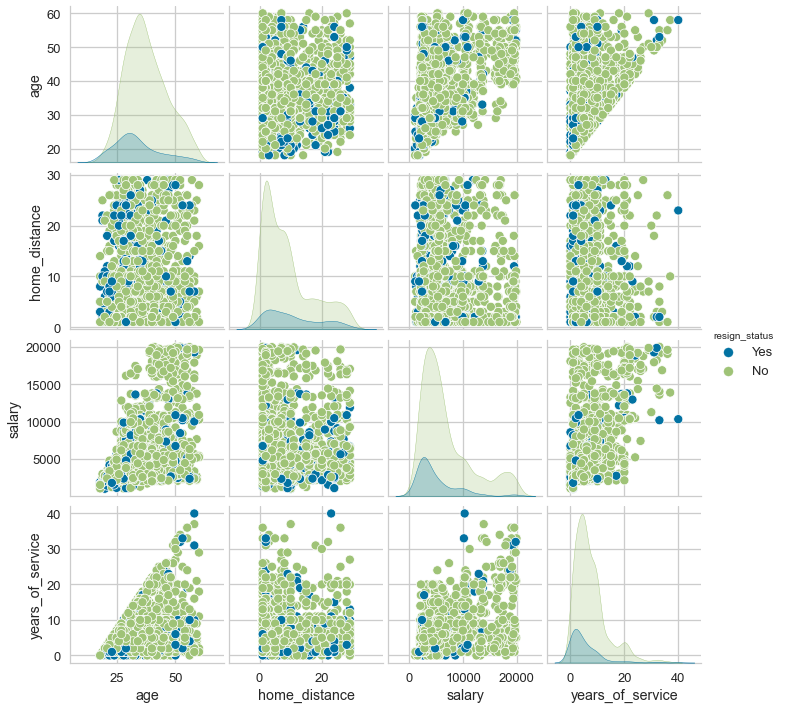

In [97]:
pairplot_data = employees_eda[['age', 'home_distance', 'salary', 'years_of_service', 'resign_status']] # get numerical and resign_status features for pairplot
sns.pairplot(pairplot_data, hue='resign_status')
plt.show()

## Correlation Heatmap
* Plot correlation heatmap of continuous and ordinal features, using Spearman Rank correlation since both numerical and ordinal features are included.
https://journals.sagepub.com/doi/pdf/10.1177/8756479308317006 
* Before plotting the heatmap, `businesstravel` feature needs to be ordinally encoded as it is in string format and its values can be ranked.

In [98]:
continuous_ordinal = employees_eda.drop(['gender', 'resign_status', 'job_function', 'marital_status'], axis=1) # get continuous and ordinal features only

### Encode `businesstravel`
Using sklearn Ordinal Encoder to encode the feature

In [99]:
list(continuous_ordinal['businesstravel'].unique()) # values in feature

['Travel_Rarely', 'Travel_Frequently', 'Non-Travel']

In [100]:
# Ordinally encode business travel feature
encode_values = ['Non-Travel', 'Travel_Rarely', 'Travel_Frequently'] # rank values in feature
enc = OrdinalEncoder(categories=[encode_values]) # instantiate ordinal encoder object

# Encode businesstravel and replace the original in the dataframe
new_businesstravel = pd.DataFrame(enc.fit_transform(continuous_ordinal[['businesstravel']]), columns=['businesstravel_enc']) # encode feature
continuous_ordinal = pd.concat([continuous_ordinal, new_businesstravel], axis=1).drop(['businesstravel'], axis=1) # join encoded feature to original dataframe

In [101]:
continuous_ordinal.head()

,age,home_distance,education,job_satisfaction,salary,performance,work_life_balance,years_of_service,businesstravel_enc
0,41,1,2,4,5993,3,1,6,1.0
1,49,8,1,2,5130,4,3,10,2.0
2,37,2,2,3,2090,3,3,0,1.0
3,33,3,4,3,2909,3,3,8,2.0
4,27,2,1,2,3468,3,3,2,1.0


### Plot Heatmap
Using Spearman Rank correlation

Observations:
* There is a moderate positive correlation between `age` and `salary` (0.47). A reason may be that employees that are of higher age generally have more experience/expertise and therefore are paid more
* There is also a moderate positive correlation between `years_of_service` and `salary` (0.46). This can be due to the company increasing the pay for employees that stayed with the company for a long time.

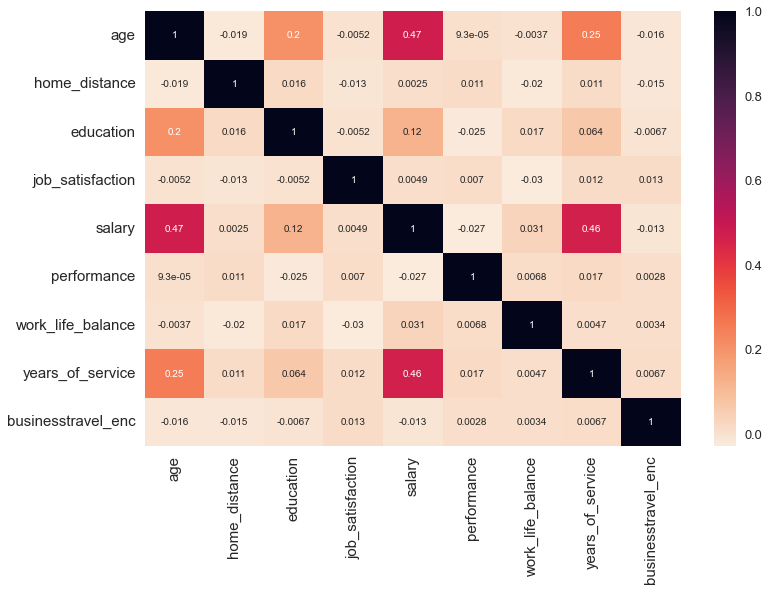

In [102]:
corr_matrix = continuous_ordinal.corr(method='spearman') # spearman correlation matrix

fig = plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='rocket_r',) # heatmap of correlation matrix
# increase font size of correlation matrix
for item in fig.axes[0].get_yticklabels():
    item.set_fontsize(15)
for item in fig.axes[0].get_xticklabels():
    item.set_fontsize(15)
plt.show()

# Data Preprocessing
Some feature engineering and preprocessing has to be done to the data to make it usable for the clustering algorithms.
* Encoding categorical features
* Feature Engineering
* Feature Scaling

In [103]:
employees_copy = employees.copy()

## Nominal Encoding
There are 4 nominal categorical variables in this dataset: `gender`, `resign_status`, `job_function`, `marital_status`

These 4 features need to be encoded into numeric values (1s and 0s since they are nominal) before the dataset can be used for clustering algorithms in sklearn. As `job_function` and `marital_status` are non-binary, sklearn's OneHotEncoder can be used to encode them.

In [104]:
nominal_features = ['gender', 'resign_status', 'job_function', 'marital_status'] # list of nominal features
ohe = OneHotEncoder(drop='first') # instantiate one hot encoder object

encoded_values = ohe.fit_transform(employees_copy[nominal_features]) # encode nominal features
encoded_df = pd.DataFrame(encoded_values.toarray(), columns=ohe.get_feature_names()) # convert to dataframe
encoded_df.head()

,x0_Male,x1_Yes,x2_Research & Development,x2_Sales,x3_Married,x3_Single
0,0.0,1.0,0.0,1.0,0.0,1.0
1,1.0,0.0,1.0,0.0,1.0,0.0
2,1.0,1.0,1.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0


In [105]:
new_feature_names = { # set new feature names
    'x0_Male': 'is_male',
    'x1_Yes': 'has_resigned',
    'x2_Research & Development': 'job_is_research',
    'x2_Sales': 'job_is_sales',
    'x3_Married': 'is_married',
    'x3_Single': 'is_single'
}

encoded_df.rename(columns=new_feature_names, inplace=True)

In [106]:
# join encoded dataframe to original dataframe
employees_encoded = pd.concat([employees_copy, encoded_df], axis=1).drop(nominal_features, axis=1)
employees_encoded.head()

,age,businesstravel,home_distance,education,job_satisfaction,salary,performance,work_life_balance,years_of_service,is_male,has_resigned,job_is_research,job_is_sales,is_married,is_single
0,41,Travel_Rarely,1,2,4,5993,3,1,6,0.0,1.0,0.0,1.0,0.0,1.0
1,49,Travel_Frequently,8,1,2,5130,4,3,10,1.0,0.0,1.0,0.0,1.0,0.0
2,37,Travel_Rarely,2,2,3,2090,3,3,0,1.0,1.0,1.0,0.0,0.0,1.0
3,33,Travel_Frequently,3,4,3,2909,3,3,8,0.0,0.0,1.0,0.0,1.0,0.0
4,27,Travel_Rarely,2,1,2,3468,3,3,2,1.0,0.0,1.0,0.0,1.0,0.0


## Ordinal Encoding
There is 1 ordinal categorical variable in this dataset: `business_travel`. This feature can be ordinally encoded as its values are ['Non-Travel', 'Travel_Rarely', 'Travel_Frequently'], which can be ranked

In [107]:
list(employees_encoded['businesstravel'].unique()) # unique values in feature

['Travel_Rarely', 'Travel_Frequently', 'Non-Travel']

In [108]:
# Ordinally encode business travel feature
encode_values = ['Non-Travel', 'Travel_Rarely', 'Travel_Frequently'] # rank values in feature
enc = OrdinalEncoder(categories=[encode_values]) # instantiate ordinal encoder object

# Encode businesstravel and replace the original in the dataframe
businesstravel_encoded = pd.DataFrame(enc.fit_transform(employees_encoded[['businesstravel']]), columns=['business_travel']) # encode feature
employees_encoded = pd.concat([employees_encoded, businesstravel_encoded], axis=1).drop(['businesstravel'], axis=1) # join encoded feature to original dataframe
display(employees_encoded)

,age,home_distance,education,job_satisfaction,salary,performance,work_life_balance,years_of_service,is_male,has_resigned,job_is_research,job_is_sales,is_married,is_single,business_travel
0,41,1,2,4,5993,3,1,6,0.0,1.0,0.0,1.0,0.0,1.0,1.0
1,49,8,1,2,5130,4,3,10,1.0,0.0,1.0,0.0,1.0,0.0,2.0
2,37,2,2,3,2090,3,3,0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
3,33,3,4,3,2909,3,3,8,0.0,0.0,1.0,0.0,1.0,0.0,2.0
4,27,2,1,2,3468,3,3,2,1.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,23,2,4,2571,3,3,5,1.0,0.0,1.0,0.0,1.0,0.0,2.0
1466,39,6,1,1,9991,3,3,7,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1467,27,4,3,2,6142,4,3,6,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1468,49,2,3,2,5390,3,2,9,1.0,0.0,0.0,1.0,1.0,0.0,2.0


## Feature Selection
trying cramer v

In [109]:
chi2_df = employees_encoded[['is_male', 'job_is_research', 'job_is_sales',
                'is_married', 'is_single', 'education', 'performance', 'business_travel', 'job_satisfaction', 'work_life_balance']]

In [110]:
from sklearn.feature_selection import chi2

chi2_results = chi2(chi2_df, employees_encoded[['has_resigned']])
pd.DataFrame(chi2_results[1].round(4), index=chi2_df.columns)

,0
is_male,0.4751
job_is_research,0.0543
job_is_sales,0.0097
is_married,0.0102
is_single,0.0000
education,0.4706
performance,0.9821
business_travel,0.0129
job_satisfaction,0.0081
work_life_balance,0.2975


In [111]:
employees_reduced = employees_encoded.drop(['is_male', 'education', 'performance', 'work_life_balance', 'job_is_research'], axis=1)

In [112]:
employees_reduced.head()

,age,home_distance,job_satisfaction,salary,years_of_service,has_resigned,job_is_sales,is_married,is_single,business_travel
0,41,1,4,5993,6,1.0,1.0,0.0,1.0,1.0
1,49,8,2,5130,10,0.0,0.0,1.0,0.0,2.0
2,37,2,3,2090,0,1.0,0.0,0.0,1.0,1.0
3,33,3,3,2909,8,0.0,0.0,1.0,0.0,2.0
4,27,2,2,3468,2,0.0,0.0,1.0,0.0,1.0


## Feature Scaling
Since many clustering algorithms use some sort of distance metric (Euclidean, Manhattan. etc.) to cluster the data, the data needs to be scaled before it can be used for clustering so that the differing magnitudes of the features would not skew the clustering results. 

The sklearn's StandardScaler can be used to scale the data. StandardScaler uses Z-score standardization to standardize the dataset features to a mean of 0 and standard deviation of 1.

In [113]:
scaler = StandardScaler() # instantiate scaler object
# feature_list = ['age', 'home_distance', 'education', 'salary', 'performance', 'years_of_service', 'business_travel', 'job_satisfaction', 'work_life_balance'] # list of features to scale
feature_list = ['job_satisfaction', 'business_travel', 'age', 'home_distance', 'years_of_service', 'salary'] # list of features to scale

scaled_data = pd.DataFrame(scaler.fit_transform(employees_reduced[feature_list]), columns=feature_list) # scale features

employees_final = employees_reduced.drop(feature_list, axis=1) # drop original features
employees_final = pd.concat([employees_final, scaled_data], axis=1) # join scaled features to original dataframe
employees_final.head()

,has_resigned,job_is_sales,is_married,is_single,job_satisfaction,business_travel,age,home_distance,years_of_service,salary
0,1.0,1.0,0.0,1.0,1.153254,-0.162399,0.446350,-1.010909,-0.164613,-0.108350
1,0.0,0.0,1.0,0.0,-0.660853,1.717339,1.322365,-0.147150,0.488508,-0.291719
2,1.0,0.0,0.0,1.0,0.246200,-0.162399,0.008343,-0.887515,-1.144294,-0.937654
3,0.0,0.0,1.0,0.0,0.246200,1.717339,-0.429664,-0.764121,0.161947,-0.763634
4,0.0,0.0,1.0,0.0,-0.660853,-0.162399,-1.086676,-0.887515,-0.817734,-0.644858


In [114]:
employees_final.shape

(1470, 10)

## Hopkins Test
The Hopkins statistic is used to assess the clustering tendency of a data set by measuring the probability that a given data set is generated by uniform data distribution.

If H < 0.5, then it is unlikely that D has statistically significant clusters. If the value of Hopkins statistic is close to 1, then we can reject the null hypothesis and conclude that the dataset D is significantly a clusterable data.

In [115]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
    
    rand_X = sample(range(0, n, 1), m)
    
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
    
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
    
    return H

In [145]:
hopkins(employees_final)

0.7074773277569165

In [146]:
# # plot t-SNE graph
# tsne = TSNE(n_components=2, random_state=42) # instantiate t-SNE object
# tsne_data = tsne.fit_transform(employees_final) # fit and transform data
# tsne_df = pd.DataFrame(tsne_data, columns=['tsne_1', 'tsne_2']) # convert to dataframe
# sns.scatterplot(x='tsne_1', y='tsne_2', data=tsne_df) # plot t-SNE graph
# plt.show()

# Evaluation metrics for clustering
Since this is an unsupervised learning task, there is no known labels to compare our clustering results to. Therefore, evaluation of clustering models can be done by using some sort of metric on the created clusters itself. The following evaluation metrics will be used to evaluate our clustering results

<h3>Silhouette Coefficient</h3>
A higher silhouette coefficient indicates that the model has better defined clusters. The minumum score is -1 and maximum is 1. Negative values generally means that a sample is assigned to the wrong cluster, values closer to 1 mean that clusters are dense and well separated.
Scores close to 0 indicate overlapping clusters.

<h3>Calinski-Harabasz Index</h3>
This metric is calculated by the ratio between sum of between-cluster distances to sum of within-cluster distances. So intuitively, higher the score, the better the clustering.

## Clustering Graphical Intepretation

In [120]:
def cluster_eval(og_df, labels):
    labels_df = pd.DataFrame(labels, columns=['labels'])
    evals_df = pd.concat([og_df, labels_df], axis=1)
    # change datatype of labels to string
    evals_df['labels'] = evals_df['labels'].astype(str)

    # categoricals = ['is_male', 'has_resigned', 'job_is_research', 'job_is_sales', 'is_married', 'is_single', 'job_satisfaction', 'work_life_balance', 'performance', 'business_travel', 'education']
    categoricals = ['gender', 'businesstravel', 'job_function', 'education', 'job_satisfaction', 'marital_status', 'performance', 'work_life_balance', 'resign_status']
    numericals = ['home_distance', 'age', 'salary', 'years_of_service']

    plt.figure(figsize=(30, 6))
    for i, feature in enumerate(numericals): # plot histograms for numerical features
        plt.subplot(1, 4, i+1)
        sns.histplot(data=evals_df, x=feature, kde=True, color='#2c7bb6', hue='labels')
        plt.title(feature)
    plt.show()

    plt.figure(tight_layout=True, figsize=(17, 10))
    for i, feature in enumerate(numericals): # plot boxplots for numerical features
        plt.subplot(4, 1, i+1)
        sns.boxplot(data=evals_df, x=feature, y='labels')
        plt.title(feature)
    plt.show()

    plt.figure(tight_layout=True, figsize=(23, 11))
    for i, feature in enumerate(categoricals): # plot barcharts for categorical features
        plt.subplot(3, 4, i+1)
        sns.countplot(data=evals_df, x=feature, hue='labels')
        plt.title(feature)
    plt.show()

## Analysis Functions

In [121]:
def summary_analysis(og_df, labels):
    labels_df = pd.DataFrame(labels, columns=['labels'])
    evals_df = pd.concat([og_df, labels_df], axis=1)
    # change datatype of labels to string
    evals_df['labels'] = evals_df['labels'].astype(str)

    # get percentage of resign status yes and no for each cluster
    for i in range(len(np.unique(labels))):
        percent_yes = evals_df[evals_df['labels'] == str(i)]['resign_status'].value_counts()[1] / evals_df[evals_df['labels'] == str(i)]['resign_status'].value_counts().sum() * 100
        percent_no = evals_df[evals_df['labels'] == str(i)]['resign_status'].value_counts()[0] / evals_df[evals_df['labels'] == str(i)]['resign_status'].value_counts().sum() * 100
        print(f'Cluster {i} Resign Status: {percent_yes}% yes, {percent_no}% no')

    print('\n')
    # get sum of people in each cluster
    for i in range(len(np.unique(labels))):
        calc = evals_df[evals_df['labels'] == str(i)].shape[0] / evals_df.shape[0] * 100
        print(f'Cluster {i} Percentage of Total Population: {calc}%')

    print('\n')
    # get percentage of each job function for each cluster
    for i in range(len(np.unique(labels))):
        percent_research = evals_df[evals_df['labels'] == str(i)]['job_function'].value_counts()[0] / evals_df[evals_df['labels'] == str(i)]['job_function'].value_counts().sum() * 100
        percent_sales = evals_df[evals_df['labels'] == str(i)]['job_function'].value_counts()[1] / evals_df[evals_df['labels'] == str(i)]['job_function'].value_counts().sum() * 100
        percent_management = evals_df[evals_df['labels'] == str(i)]['job_function'].value_counts()[2] / evals_df[evals_df['labels'] == str(i)]['job_function'].value_counts().sum() * 100
        print(f'Cluster {i} Job Function: {percent_research.round(2)}% research, {percent_sales.round(2)}% sales, {percent_management.round(2)}% management')

# K-Means Clustering
This is a distance-based algorithm that creates k-clusters based on the input. It initializes k centroids which tries to minimize a criterion known as inertia, by repeating the process of re-grouping data points to the nearest centroid or moving the centroids itself until the algorithm reaches its maximum iterations have been reached or the centroids stop moving significantly.

### Elbow Plots

Elbow plots will be visualised using the yellowbricks library, which has built in functions to visualise the elbow plots for various clustering metrics.
* The Distortion Score elbow helps to visualize the distortion score at different values of k. Distortion is the average of the squared (euclidean) distance of the data point from the centroid of the respective cluster.
* The Calinski Harabasz elbow helps to visualize the Calinski-Harabasz Index at different values of k.

Observations:
* The Distortion score plot shows an elbow of around k=5 at around a score of 9100, however the Calinski-Harabasz score plot shows the highest score at k=2 at around 230, with a drop in score at k increases
* The results may indicate that k-means may not be the best algorithm for this dataset, a silhouette analysis should also be done to confirm this.

In [122]:
kmeans = KMeans(random_state=48, max_iter=1000) # instantiate kmeans object

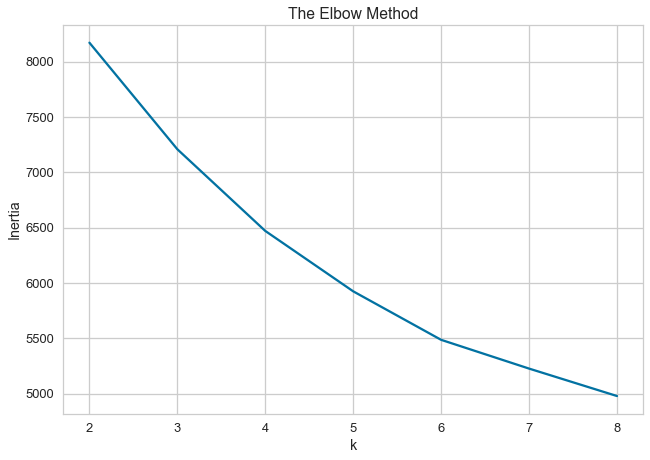

In [123]:
inertias = []
k_range = range(2,9) # Range of k values

for k in k_range:
    kmeans = KMeans(random_state=48, max_iter=1000, n_clusters=k) # instantiate kmeans object
    kmeans.fit(employees_final) # fit kmeans object to data
    inertias.append(kmeans.inertia_) # append inertia value to log

plt.plot(k_range, inertias, 'bx-') # plot inertia values against k values
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method')
plt.show()

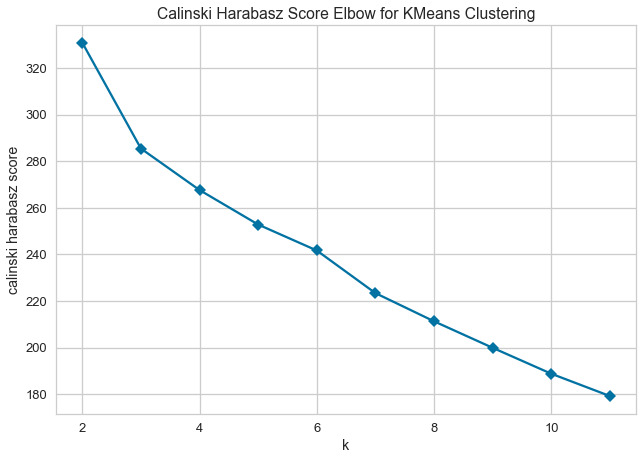

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [124]:
visualizer = KElbowVisualizer(kmeans, k=(2,12), metric='calinski_harabasz', timings=False, locate_elbow=False)
visualizer.fit(employees_final)    # Fit the data to the visualizer
visualizer.show()    # Finalize and render the figure

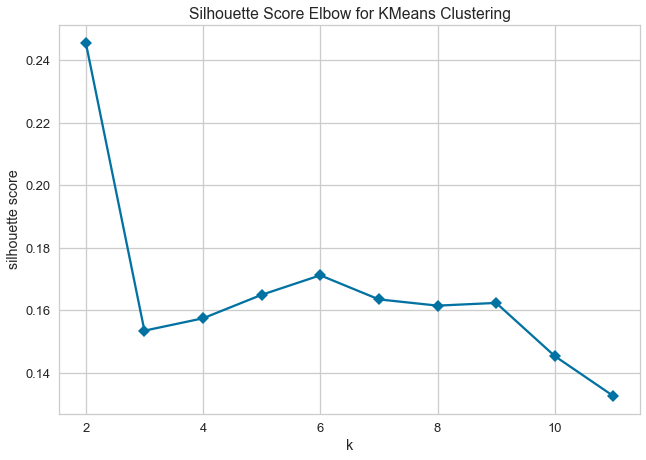

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [125]:
visualizer = KElbowVisualizer(kmeans, k=(2,12), metric='silhouette', timings=False, locate_elbow=False)
visualizer.fit(employees_final)    # Fit the data to the visualizer
visualizer.show()    # Finalize and render the figure

### Silhouette Analysis
Silhouette analysis visualizes Silhouette score metric for each cluster to find out the separation distance between the different clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters. The thickness of the silhouette plot represents the cluster size.

I will be using k=5 to 8 for this silhouette analysis, as selected by the distortion score elbow plot.

<b>Observations:</b>
* The average silhouette score for all values of k is low at around 0.11, this suggests that the clusters are not well separated and dense.
* There are some clusters that have negative silhouette scores, which means that the clusters are overlapping and some data points may be assigned to the wrong cluster.

Based on the observations, I would be doing feature selection in order to reduce the dimensionality of the dataset, as the clustering may have been affected by the high dimensionality of this dataset (14 features) or by the abundance of nominal features which may have affected the clustering as euclidean distance is used to cluster the data.

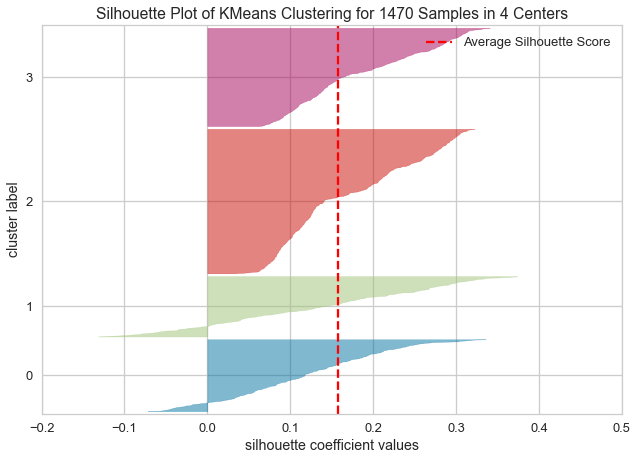

In [147]:
silhouette_visualizer(KMeans(4, random_state=48), employees_final, colors='yellowbrick')
plt.show()

# Agglomerative Clustering

In [ ]:
agglo = AgglomerativeClustering(linkage='ward') # instantiate agglomerative clustering object

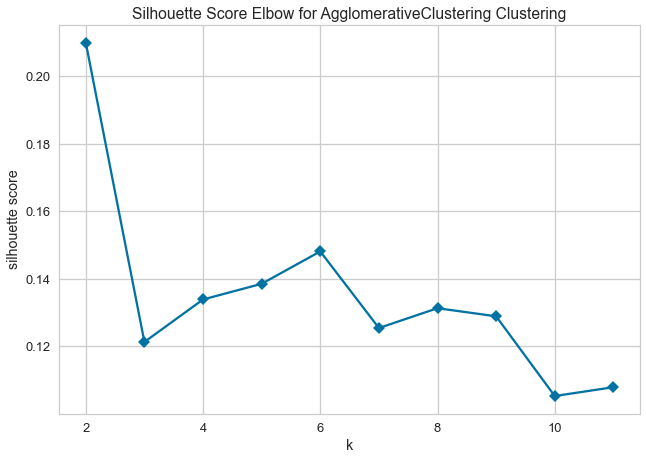

<AxesSubplot:title={'center':'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
visualizer = KElbowVisualizer(agglo, k=(2,12), metric='silhouette', timings=False, locate_elbow=False)
visualizer.fit(employees_final)    # Fit the data to the visualizer
visualizer.show()    # Finalize and render the figure

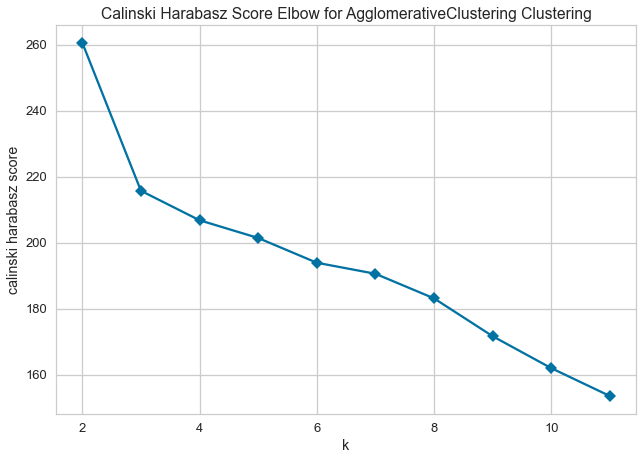

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [ ]:
visualizer = KElbowVisualizer(agglo, k=(2,12), metric='calinski_harabasz', timings=False, locate_elbow=False)
visualizer.fit(employees_final)    # Fit the data to the visualizer
visualizer.show()    # Finalize and render the figure

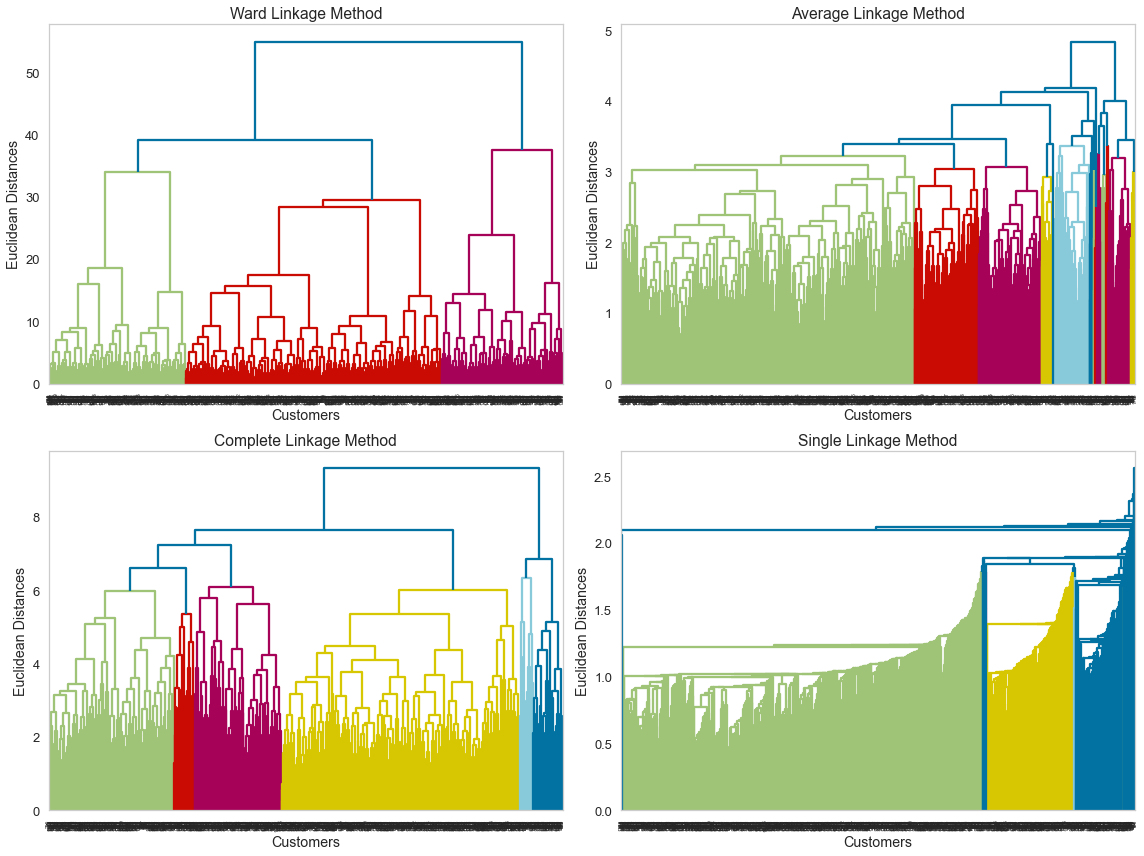

In [ ]:
# silhouette visualizer with 2 clusters agglometarive clustering
from scipy.cluster.hierarchy import linkage, dendrogram

linkage_methods = ['Ward', 'Average', 'Complete', 'Single']

fig = plt.figure(figsize=(16, 12), tight_layout=True)

for i, method in enumerate(linkage_methods):
    # create linkage
    link = linkage(employees_final, method=method.lower())
    # plot dendrogram
    ax = fig.add_subplot(220 + i + 1)
    dendrogram(link, ax=ax, orientation='top', distance_sort='descending')
    # custom dendrogram labels
    ax.set_title('{} Linkage Method'.format(method))
    ax.set_ylabel('Euclidean Distances')
    ax.grid(False)

plt.show()

# MeanShift Clustering

In [129]:
bandwidth = estimate_bandwidth(employees_final, quantile=1, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(employees_final)

labels = ms.labels_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("number of estimated clusters : %d" % n_clusters_)
print(f"estimated bandwidth: {bandwidth}")

number of estimated clusters : 1
estimated bandwidth: 6.898874909723779


In [130]:
# bandwidth 2 to 2.6 is a good range to test on
bandwidth = estimate_bandwidth(employees_final, quantile=1, n_samples=500)
ms = MeanShift(bandwidth=2, bin_seeding=True)
ms.fit(employees_final)

labels = ms.labels_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 18


In [134]:
# loop meanshift for bandwidth of 2 to 2.7 and plot silhouette score against bandwidth
for i in np.arange(2, 2.5, 0.1):
    ms = MeanShift(bandwidth=i, bin_seeding=True)
    ms.fit(employees_final)
    labels = ms.labels_
    labels_unique = np.unique(labels)
    n_clusters_ = len(labels_unique)
    print(f"bandwidth: {i.round(2)}, clusters: {n_clusters_}, silhouette_score: {silhouette_score(employees_final, labels)}, calinski_harabasz: {calinski_harabasz_score(employees_cleaned, labels)}")
    plt.show()

bandwidth: 2.0, clusters: 18, silhouette_score: 0.08783377847630124, calinski_harabasz: 34.12223226356367
bandwidth: 2.1, clusters: 8, silhouette_score: 0.16091627393696473, calinski_harabasz: 52.70976985360581
bandwidth: 2.2, clusters: 5, silhouette_score: 0.1958010925094073, calinski_harabasz: 80.18435768693384
bandwidth: 2.3, clusters: 4, silhouette_score: 0.20941615211744227, calinski_harabasz: 62.71134071932303
bandwidth: 2.4, clusters: 2, silhouette_score: 0.35523820320078364, calinski_harabasz: 92.31803957384875


# Final Decision: K-Means Clustering
As K-Means clustering has significantly higher silhouette and calinski-harabasz scores than the other clustering algorithms, it will be used for this dataset to achieve employee segmentation and solve the following questions
* Describe the characteristics of each employee cluster. 
* Which group of employee is the most vulnerable that the management should do something to retain them.

## K-Means Clustering Final Model
The number of clusters to use would b 4
Reasoning:
* Even though silhouette score and calinski-harabasz score are both high at 2 clusters, There is an high inertia of above 8000. This indicates that the data points are far apart from the centroid of the cluster.
* As the number of clusters increases, the silhouette score and calinski-harabasz score decreases.
* However, silhouette score spikes up to 0.159 at 4 clusters
* Thus, the number of clusters to use would be 4 to achieve a balance that inertia will be low and silhouette score as well as calinsky-harabasz score will be still moderately high compared to when other number of clusters are used

In [137]:
kmeans = KMeans(random_state=48, max_iter=1000, n_clusters=4) # instantiate kmeans object
kmeans.fit(employees_final) # fit kmeans object to data
labels = kmeans.labels_

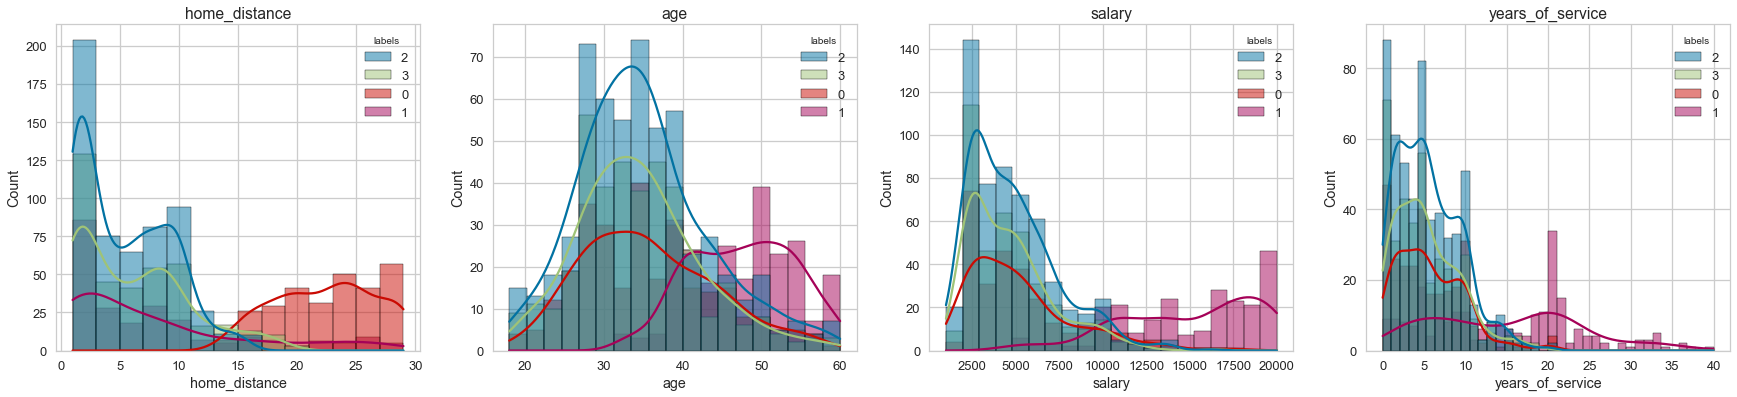

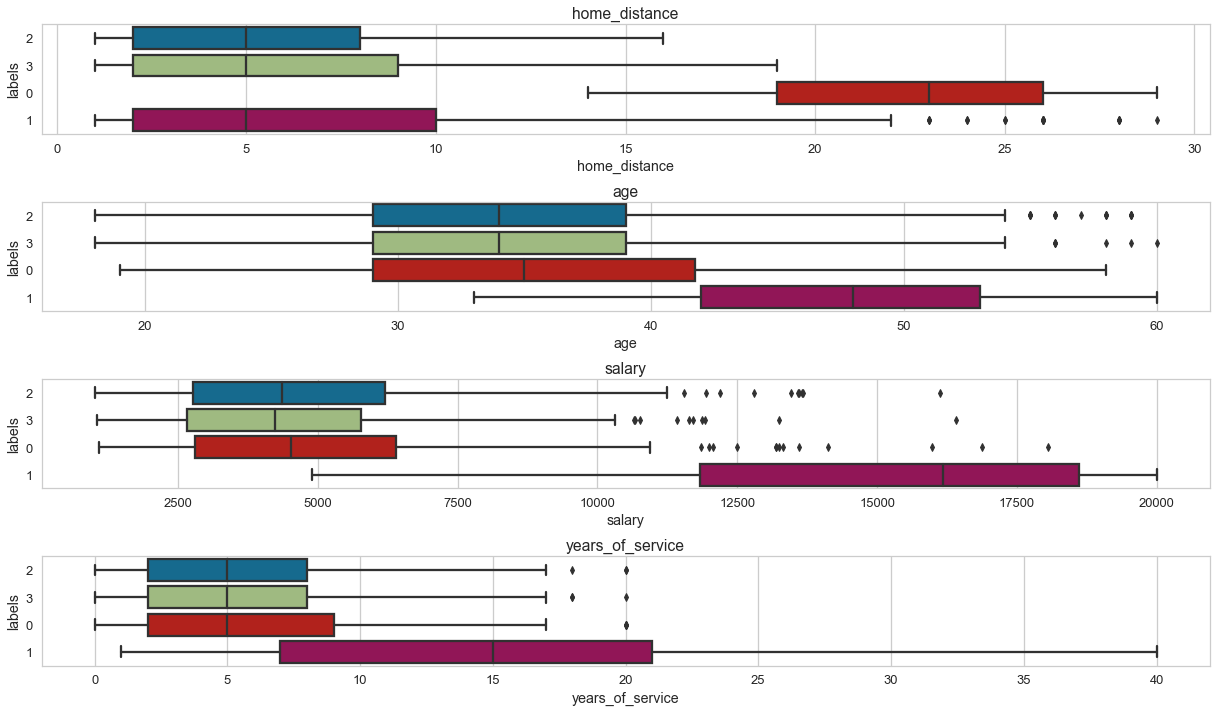

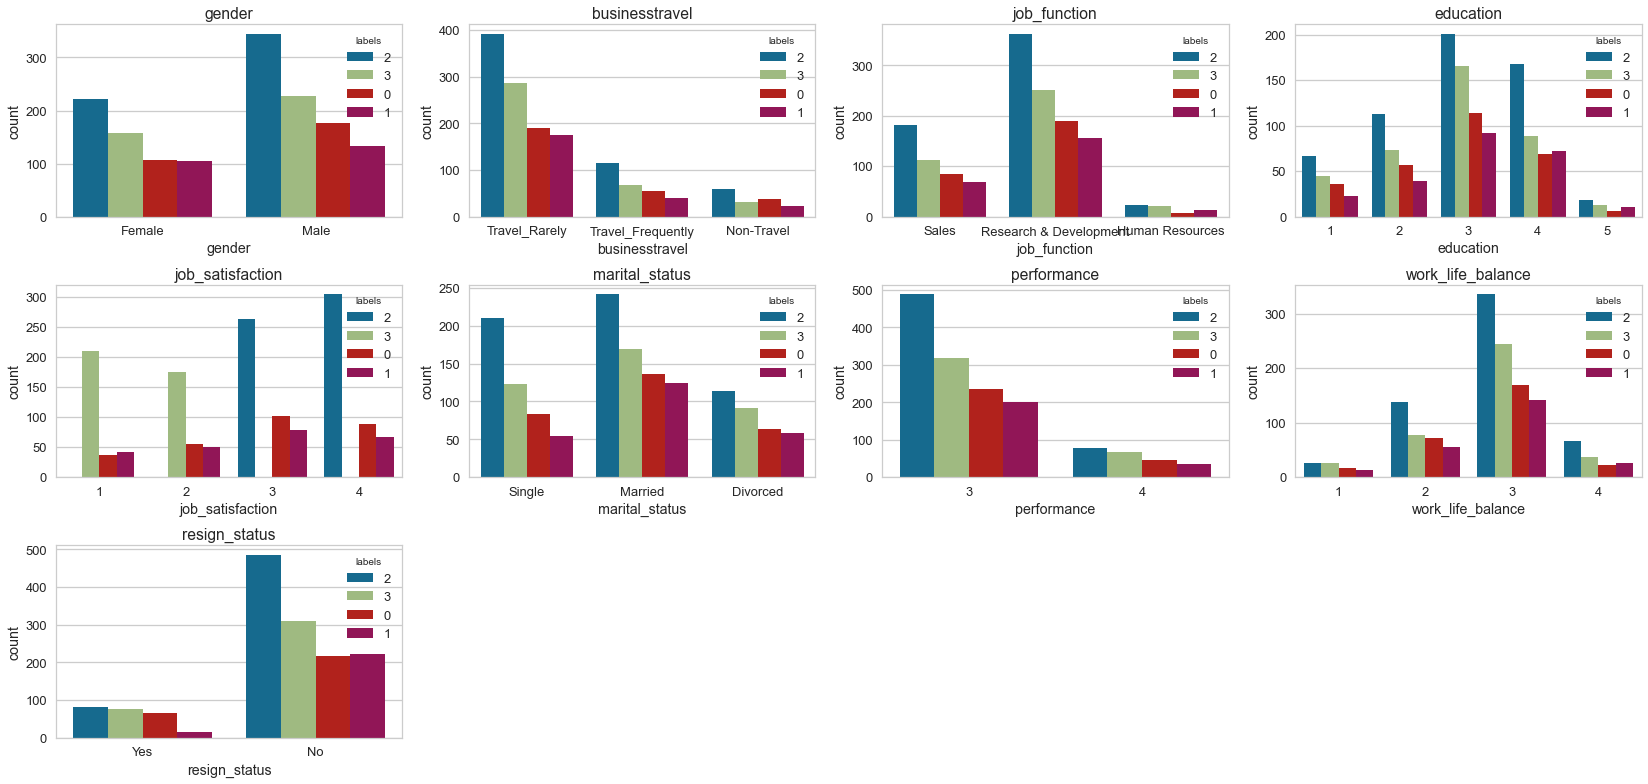

In [139]:
cluster_eval(employees, labels)

In [140]:
summary_analysis(employees, labels)

Cluster 0 Resign Status: 23.404255319148938% yes, 76.59574468085107% no
Cluster 1 Resign Status: 6.751054852320674% yes, 93.24894514767934% no
Cluster 2 Resign Status: 14.13427561837456% yes, 85.86572438162544% no
Cluster 3 Resign Status: 19.480519480519483% yes, 80.51948051948052% no


Cluster 0 Percentage of Total Population: 19.183673469387756%
Cluster 1 Percentage of Total Population: 16.122448979591837%
Cluster 2 Percentage of Total Population: 38.50340136054422%
Cluster 3 Percentage of Total Population: 26.190476190476193%


Cluster 0 Job Function: 67.38% research, 29.79% sales, 2.84% management
Cluster 1 Job Function: 65.82% research, 28.69% sales, 5.49% management
Cluster 2 Job Function: 64.13% research, 31.98% sales, 3.89% management
Cluster 3 Job Function: 65.45% research, 29.35% sales, 5.19% management


# Cluster Intepretations

<b>Cluster 0</b> - The Travellers
* They live further from the office than everyone else, the median distance that employees here live from the office is around 23km.
* This cluster also has the highest resignation rate at 23.4%.

<b>Cluster 1</b> - The Seniors
* The median age of employees in this group is distinctively higher than the other clusters, at around 48 years old. The median years of service in this cluster is also 15 years
* The population percentage of this cluster is the lowest, at 16.12% of the total employee population in this dataset
* Being the seniors, the median salary in this cluster is also the highest, at roughly $16000
* The resignation rate in this cluster is also the lowest, at 6.75%

<b>Cluster 2</b> - The Employees who love their job
* In this cluster, most, if not everyone voted 3 or 4 for the job satisfaction rating. 
* This cluster also has the highest number of employees, at around 38.5% of the total population of employees in this dataset.
* Percentage of employees who work in sales in this cluster is also the highest compared to other clusters, at 31.98%

<b>Cluster 3</b> - The Unsatisfied Employees
* In this cluster, most, if not everyone voted 1 or 2 for the job satisfaction rating.
* This cluster has the lowest median salary at around $4000, and also the lowest salary range.
* The resignation rate is the 2nd highest in this cluster, at 19.48%

## The most vulnerable employee group
After using the K-Means clustering algorithm, and intepreting the clusters, I can conclude that <b>Cluster 0 - The Travellers</b> are the most vulnerable group of employees. This cluster has the highest resignation rate out of all clusters at 23.4%, which is one-fifth of the entire cluster. A possible reason for this is that the employees in this cluster live further from the office than everyone else, and this is reflected in the median distance that employees here live from the office. The motivation to resign may be due to the employees wanting to <b>save time commuting</b> to the workplace, or that they want to <b>save money on commuting</b> either on public transport fare or vehicle petrol.


Possible actions that the management should take to retain the employees in this group:
* Provide transport subsidy to employees who commute on public transport or private hire.
* Subsidize petrol prices for employees who commute using their own vehicle, or the company can provide cars for the employees.
* The company can hire bus drivers to transport the employees to the workplace, instead of them needing to commute on their own.